In [1]:
import numpy
import matplotlib.pyplot as plt
import math

# Exersice 1

![alt text](Exc1.png)

# Exersice 2

In [2]:

x = numpy.array([0, 0.5, 1, 1.5, 2, 2.99, 3])
y = numpy.array([0, 0.52, 1.09, 1.75, 2.45, 3.5, 4])


def least_squard(x, y):
    A = numpy.array([x, x**2])
    left = numpy.dot(A, A.T)
    right = numpy.dot(A, y)
    b= numpy.linalg.solve(left, right)
    return numpy.array([0, b[0], b[1]])


def polynomial_interpolation(x, y):
    A = numpy.array([x**i for i in range(len(x))]).T #Naiva ansatsen --> dim(p(x)) = n-1
    return numpy.linalg.solve(A, y)

def plot(x, y, a, b):
    plt.plot(x, y, 'o')
    x2 = numpy.arange(0, 3, 0.01)
    plt.plot(x2, a[0] + a[1]*x2 + a[2]*x2**2, 'r')
    plt.plot(x2, b[0] + b[1]*x2 + b[2]*x2**2 + b[3]*x2**3 + b[4]*x2**4 + b[5]*x2**5 + b[6]*x2**6, 'g')
    plt.show()


def error_least_squard(x, y, a):
    sum = 0
    for i in range(len(x)):
        sum += (a[0] + a[1]*x[i] + a[2]*x[i]**2 - y[i])**2
    return (sum/len(x))**0.5

def error_polynomial_interpolation(x, y, b):
    sum = 0
    for i in range(len(x)):
        sum += (b[0] + b[1]*x[i] + b[2]*x[i]**2 + b[3]*x[i]**3 + b[4]*x[i]**4 + b[5]*x[i]**5 + b[6]*x[i]**6 - y[i])**2
    return (sum/len(x))**0.5


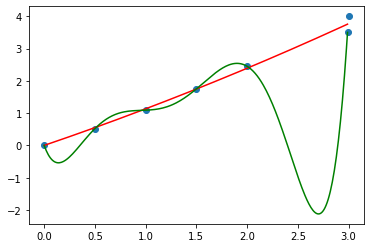

In [3]:
a = least_squard(x, y)
b = polynomial_interpolation(x, y)

a_error = error_least_squard(x, y, a)
b_error = error_polynomial_interpolation(x, y, b)

plot(x, y, a, b)

### Excersice 2 Summary

**least squared method:**
> *ax+bx^2*

- a = 1.0708944
- b = 0.06184937
- error = 0.1334657807385267


**polynomial interpol:**
> *a+bx+cx^2+dx^3+ex^4+fx^4+gx^5*

- a = 0
- b = -8.78166724
- c = 44.16511368
- d = -70.92037449
- e = 51.97907708
- f = -17.54963064
- g = 2.19748161
- error = 2.35750041823958e-13



# Exersice 2

In [4]:
x = numpy.array([150, 200, 300, 500, 1000, 2000])
y = numpy.array([2, 3, 4, 5, 6, 7])

## Equation (5) 
![alt text](eq5.png)
### *Least squared method*

In [5]:
def u(a, x):
    return 8*x/(8*a+x)

def u_derivative_a(a, x):
    return -8**2*x/(8*a+x)**2


def least_squard_derivative_a(x, y, a):
    sum = 0
    for i in range(0, len(x)):
        sum += 2*(u(a, x[i]) - y[i])*u_derivative_a(a, x[i])
    return sum

def gradient_descent(x, y, a, learning_rate, iterations):
    for i in range(0, iterations):
        a = a - learning_rate*least_squard_derivative_a(x, y, a)
    return a

def plot_5(x, y, a):
    plt.plot(x, y, 'o')
    x2 = numpy.arange(0, 5000, 0.1)
    plt.plot(x2, u(a,x2), 'g')
    plt.show()
    
def error_5(x, y, a):
    sum = 0
    for i in range(len(x)):
        sum += (u(a,x[i])**2 - y[i])**2
    return (sum/len(x))**0.5


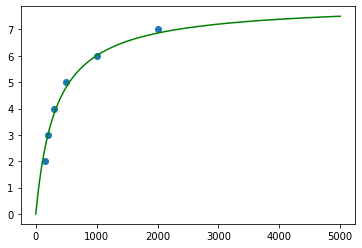

In [6]:
a = gradient_descent(x, y, 0, 0.1, 100000)
plot_5(x, y, a)

##### Equation 5 
> Least squared
- a = 41.392952696454905
- error =  22.397180719477042

## Equation (6) 
![alt text](eq6.png)
### *Linearization problem*

In [7]:
def method1(x, y):
    xlog = numpy.log(x)
    one = numpy.array([1 for x in range(0, len(x))])
    g = numpy.log(8-y)
    A = numpy.array([one, xlog]).T
    left = numpy.dot(A.T, A)
    right = numpy.matmul(A.T,g.T)
    return numpy.linalg.solve(left, right)

def plot_linear(x, y, a, b):
    x2log = numpy.log(numpy.arange(100, 2050, 1))
    plt.plot(numpy.log(x), numpy.log(8-y), 'o')
    plt.plot(x2log, a + b*x2log, 'g')
    plt.show()

def plot_exp(x, y, a, b):
    plt.plot(x, 8-y, 'o')
    x2 = numpy.arange(1, 5000, 0.1)
    plt.plot(x2, numpy.exp(a+ b*numpy.log(x2)), 'g')
    plt.ylim((0,8))
    plt.show()
   
def error_6(x, y, a, b):
    sum = 0
    for i in range(len(x)):
        sum += (8-a*x[i]**b-y[i])**2
    return (sum/len(x))**0.5    

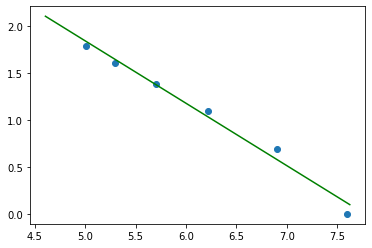

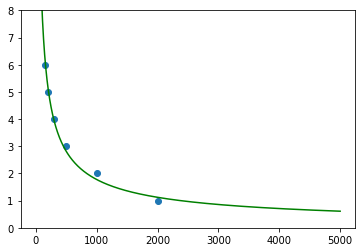

In [8]:
a, b = method1(x, y)
plot_linear(x, y, a, b)
plot_exp(x, y, a, b)

##### Equation 6
> Linearization problem
- a = 174.52465223177506
- b = -0.6640119820775088
- error =  3.7774730348645775

### *Gauss Newton*

In [9]:
def r(x,y, a, b):
    return 8 - y - a*x**b

def r_derivative_a(x, y, a, b):
    return -x**b

def r_derivative_b(x, y, a, b):
    return -a*x**b*numpy.log(x)

def jacobian_matrix_func(x, y, a, b):
    eps = 1e-6
    grad_a = (r(x, y, a+eps, b) - r(x, y, a, b))/eps
    grad_b = (r(x, y, a, b+eps) - r(x, y, a, b))/eps
    return numpy.column_stack([grad_a, grad_b]) 

def newton(x, y, a, b, iterations):
    old = new = numpy.array([a, b])
    for i in range(0, iterations):
        old = new
        jacobian_matrix = numpy.column_stack([r_derivative_a(x, y, old[0], old[1]), r_derivative_b(x, y, old[0], old[1])])
        new = old - numpy.linalg.inv(jacobian_matrix.T @ jacobian_matrix)@(jacobian_matrix.T @ r(x, y, old[0], old[1]))
        if numpy.linalg.norm(new - old) < 1e-14:
            break
    return new 

def plot_gauss_newton(x, y, a, b):
    plt.plot(x, y, 'o')
    x2 = numpy.arange(1, 5000, 0.1)
    plt.plot(x2,8- a*x2**b, 'g')
    plt.ylim((0,8))
    plt.show()
    
def error_6(x, y, a, b):
    sum = 0
    for i in range(len(x)):
        sum += (8-a*x[i]**b-y[i])**2
    return (sum/len(x))**0.5


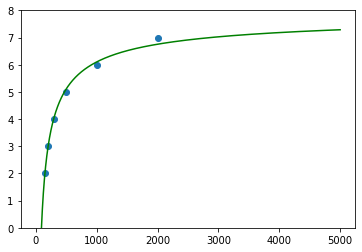

In [10]:
a,b = newton(x, y, 170, 0, 10000)
plot_gauss_newton(x, y, a, b)

##### Equation 6
> Gauss Newton
- a = 126.79319764502415
- b = -0.6082002220230582
- error =  0.12081020947745666

### *Polynomial Interpolation*

In [11]:
def polynomial_interpolaring(x, y):
    A = numpy.zeros((len(x), len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            A[i][j] = x[i]**j
    b = numpy.zeros(len(x))
    for i in range(0, len(x)):
        b[i] = y[i]
    return numpy.linalg.solve(A, b)

def plot_polynomial_interpolaring(x, y, a):
    plt.plot(x, y, 'o')
    x2 = numpy.arange(1, 5000, 0.1)
    y2 = numpy.zeros(len(x2))
    for i in range(0, len(x2)):
        for j in range(0, len(a)):
            y2[i] += a[j]*x2[i]**j
    plt.plot(x2, y2, 'g')
    plt.ylim((0,8))
    plt.show()

def polynomial_interpolaring_error(x, y, a):
    sum = 0
    for i in range(len(x)):
        val = a[0]
        for j in range(1, len(a)):
            val += a[j]*x[i]**j
        sum += (val - y[i])**2
    return (sum/len(x))**0.5

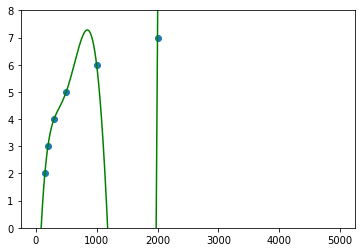

In [12]:
plot_polynomial_interpolaring(x, y,polynomial_interpolaring(x, y))

#### polynomial interpol:
> *a+bx+cx^2+dx^3+ex^4+fx^5*

- a = -5.30657128
- b = 8.03201037e-02
- c = -2.69768363e-04
- d = 4.39161514e-07
- e = -3.15403849e-10
- f = 7.69971652e-14
- error = 3.145675440961141e-14



### Excersice 3 Summary
##### Equation 5 
---
> Least squared
- a = 41.392952696454905
- error =  22.397180719477042
---

##### Equation 6
> Linearization problem
- a = 174.52465223177506
- b = -0.6640119820775088
- error =  3.7774730348645775
---
##### Equation 6
> Gauss Newton
- a = 126.79319764502415
- b = -0.6082002220230582
- error =  0.12081020947745666
---
> polynomial interpol 

*a+bx+cx^2+dx^3+ex^4+fx^5*

- a = -5.30657128
- b = 8.03201037e-02
- c = -2.69768363e-04
- d = 4.39161514e-07
- e = -3.15403849e-10
- f = 7.69971652e-14
- error = 3.145675440961141e-14



### Discussion
> *From a discrete mathematical point of view polynomial interpol is superior given it's error converging to 0. But Since is occilates it does not work well in points between the give discrete values, as seen in the graph. Therefore the best approximaiton is with gauss newton which gives a low error while following the points in a rationall manner.*

> *Equation 5 also gives a really bad approximation of the values. This might be because we cant tune the exponential parameter with the same freedome as with equation 6.*




### Exersice 3.b

![alt text](Exc3.png)

# Exersice 4


### Config

In [17]:
time_steps = 50
max_iterations = 50
start_capital = 1
precision = 1e-10

In [26]:
def g(x):
    return 2*x**0.5

def g_derivative(x):
    return x**-0.5

def f(x, f_number):
    if f_number == 1:
        return x
    elif f_number == 2:
        return x + x**2/10
    elif f_number == 3:
        a = 1.0708944
        b = 0.06184937
        return a*x+b*x**2

def f_derivative(x, f_number):
    if f_number == 1:
        return 1
    elif f_number == 2:
        return 1 + x/5
    elif f_number == 3:
        a = 1.0708944
        b = 0.06184937
        return a + 2*b*x

def EulerLagrange(time_steps, max_iterations, start_capital ,precision, f_number):
    
    dt = 1/time_steps
    X_old = numpy.zeros((time_steps+1)) + start_capital
    X_new = numpy.zeros((time_steps+1))
    X_new[0] = start_capital
    L = numpy.zeros((time_steps)) 

    for i in range(max_iterations):
        L[time_steps-1] = g_derivative(start_capital)
        for j in range(time_steps-2, -1, -1):
            L[j] = L[j+1] + dt*f(X_old[j],f_number)*L[j+1]
        for k in range(time_steps):
            X_new[k+1] = (X_new[k]+dt*(f(X_old[k],f_number)-1/(L[k]**(3/5))))
        X_old = X_new
        if numpy.linalg.norm(X_new-X_old) < precision:
            break
    X = X_new.T
    alpha = (L**(-3/5)).T
    return X, alpha

In [27]:
def plot_capital(x):
    time_axis = numpy.arange(0, time_steps+1)
    plt.plot(time_axis, x, label='Data', marker='o')
    plt. title('Capital over time')
    plt.show()
    
def plot_alpha(x):
    time_axis = numpy.arange(1, time_steps+1, 1)
    plt.plot(time_axis, x, label='Data', marker='o')
    plt. title('Spending over time')
    plt.show()
    
def plota(x,a):
    time_axis = numpy.arange(1, time_steps+1, 1)
    fig, ax = plt.subplots()
    ax.plot(time_axis, x, label='Capital')
    ax.plot(time_axis, a, label='Spending')
    ax.legend()
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    plt.show()

#### Function 1

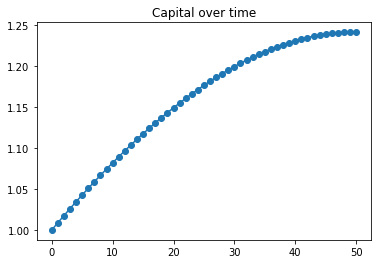

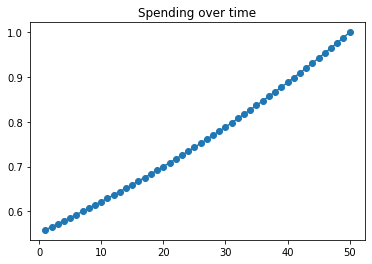

In [28]:
capital, alpha = EulerLagrange(time_steps, max_iterations, start_capital ,precision,1)
plot_capital(capital)
plot_alpha(alpha)


#### Function 2

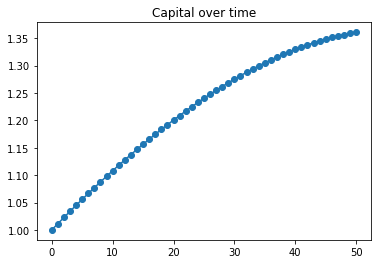

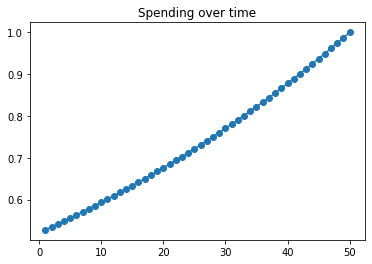

In [29]:
capital, alpha = EulerLagrange(time_steps, max_iterations, start_capital ,precision,2)
plot_capital(capital)
plot_alpha(alpha)

### Function 3

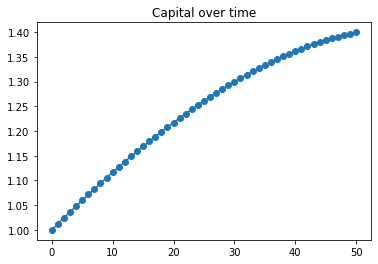

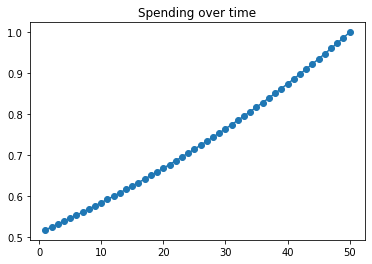

In [30]:
capital, alpha = EulerLagrange(time_steps, max_iterations, start_capital ,precision,3)
plot_capital(capital)
plot_alpha(alpha)

# Exercise 5
### *Discussion*

> Eftersom att vi använder Eulers metod för att approximera kapitalet över tid så tappar vi termer av ordning högre än 1. Detta ger ett trunkeringsfel. Detta innebär dock att felet minskar destå mindre iterationsintervallet är. 